# I. Introduction and Load DataSet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score, confusion_matrix, classification_report
import warnings    
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

from sklearn.datasets import load_iris
import lime
import lime.lime_tabular

In [2]:
df = pd.read_csv('C:\\Users\\namqt\\05.Project\\customer_churn_dataset-training-master.csv')

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


# II. Data understanding & Data preparation 

In [6]:
df.isna().sum()
df = df.dropna()

In [7]:
#Delete unnecessary columns 
df.drop(columns = 'CustomerID', inplace = True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [10]:
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


# III. EDA

## 3.1. Target feature

([<matplotlib.patches.Wedge at 0x259655e3ef0>,
 [Text(-0.8677329493873592, -0.6760469869376794, 'Not Churn'),
  Text(0.8677329493873589, 0.6760469869376797, 'Churn')],
 [Text(-0.47330888148401407, -0.3687529019660069, '43.3%'),
  Text(0.4733088814840139, 0.36875290196600713, '56.7%')])

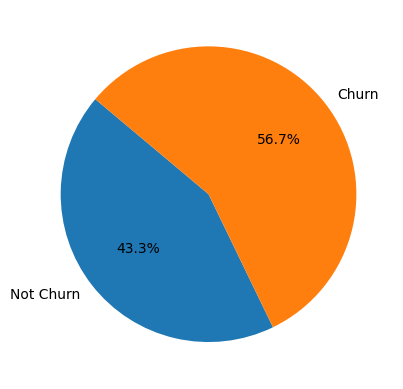

In [11]:
df_churn = df.groupby('Churn').size().reset_index(name = 'count')
df_churn['percent'] = (100*df_churn['count']/ len(df)).round(2)
labels = ['Not Churn', 'Churn']
sizes = df_churn['percent']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

In [12]:
df_churn

,Churn,count,percent
0,0.0,190833,43.29
1,1.0,249999,56.71


## 3.2. Numerical Feature 

In [13]:
numerical_feature = df.select_dtypes(include = [np.number]).columns.tolist()
numerical_feature.remove('Churn')

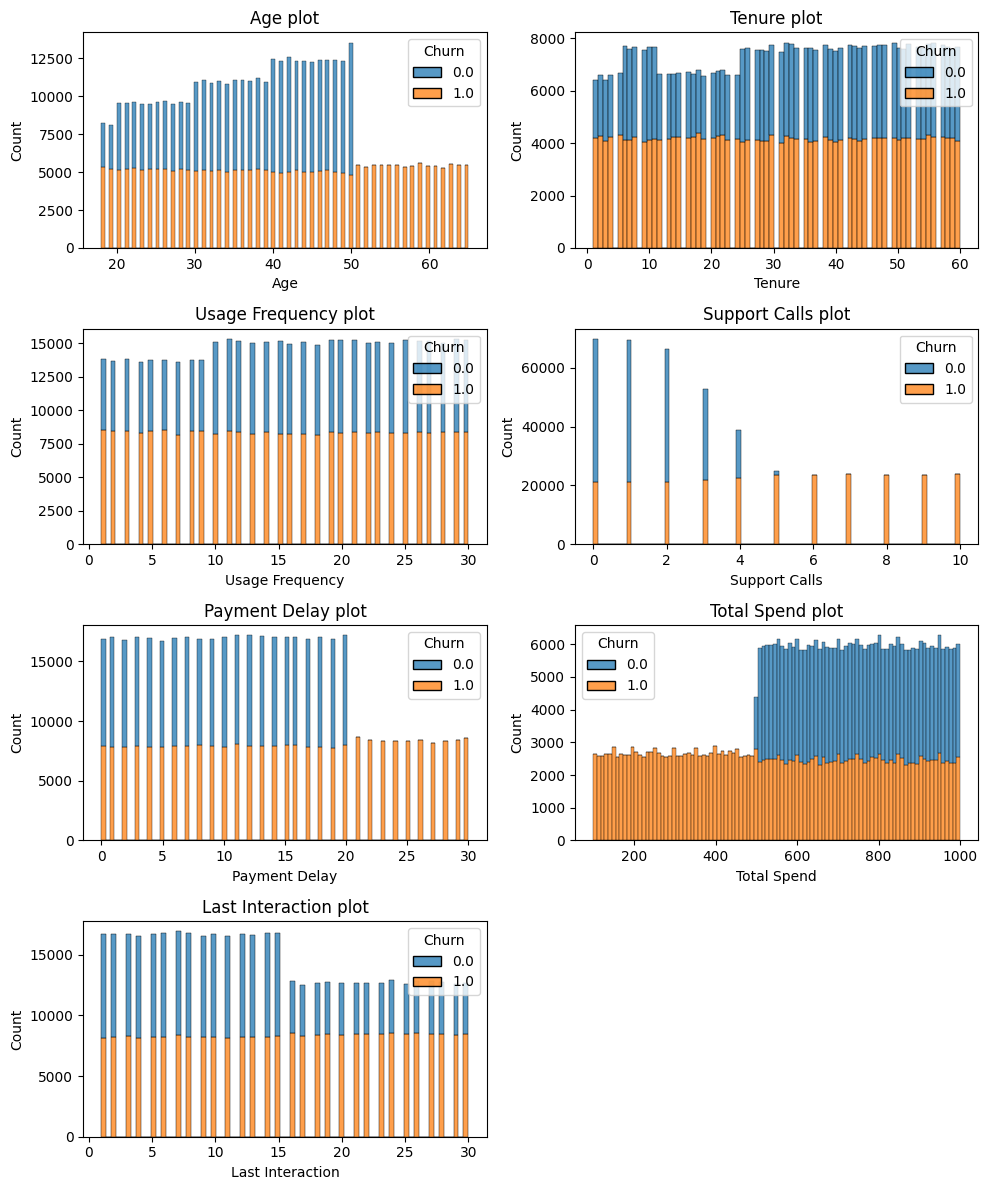

In [14]:
l = len(numerical_feature)//2 +1
fig, ax = plt.subplots(l, 2, figsize = (10,12))
for pos, i in enumerate(numerical_feature):
    sns.histplot(df, x = i, hue = 'Churn', stat = 'count', multiple = 'stack', ax = ax[pos//2, pos %2])
    ax[pos//2, pos %2].set_title(f'{i} plot')
for pos in range(len(numerical_feature), l*2):
    fig.delaxes(ax[pos//2, pos %2])

plt.tight_layout()
plt.show()

### Comment
Tỉ lệ not churn đang gấp đôi so với churned ở phần lớn các biểu đồ 

Tuy nhiên có một vài biểu đồ có tỉ lệ churned phân bố khá lớn :

Age: từ 50 đến 65 tuổi (biểu đổ phân bố chủ yếu từ 20 đến 40)

Support Calls : từ 5 cho đến 10 cuộc (biểu đồ phân bố chủ yếu từ 0 đến 3 )

Payment Delay từ 21 đến 30 (phân bố đều từ 0 đén 20)

Total Spend từ 80 đến 500 (phân bố tập trung ở 500 đến 1000)

## 3.3. Categorical Feature

In [15]:
categorical_feature = df.select_dtypes(include = [object]).columns.tolist()
categorical_feature

['Gender', 'Subscription Type', 'Contract Length']

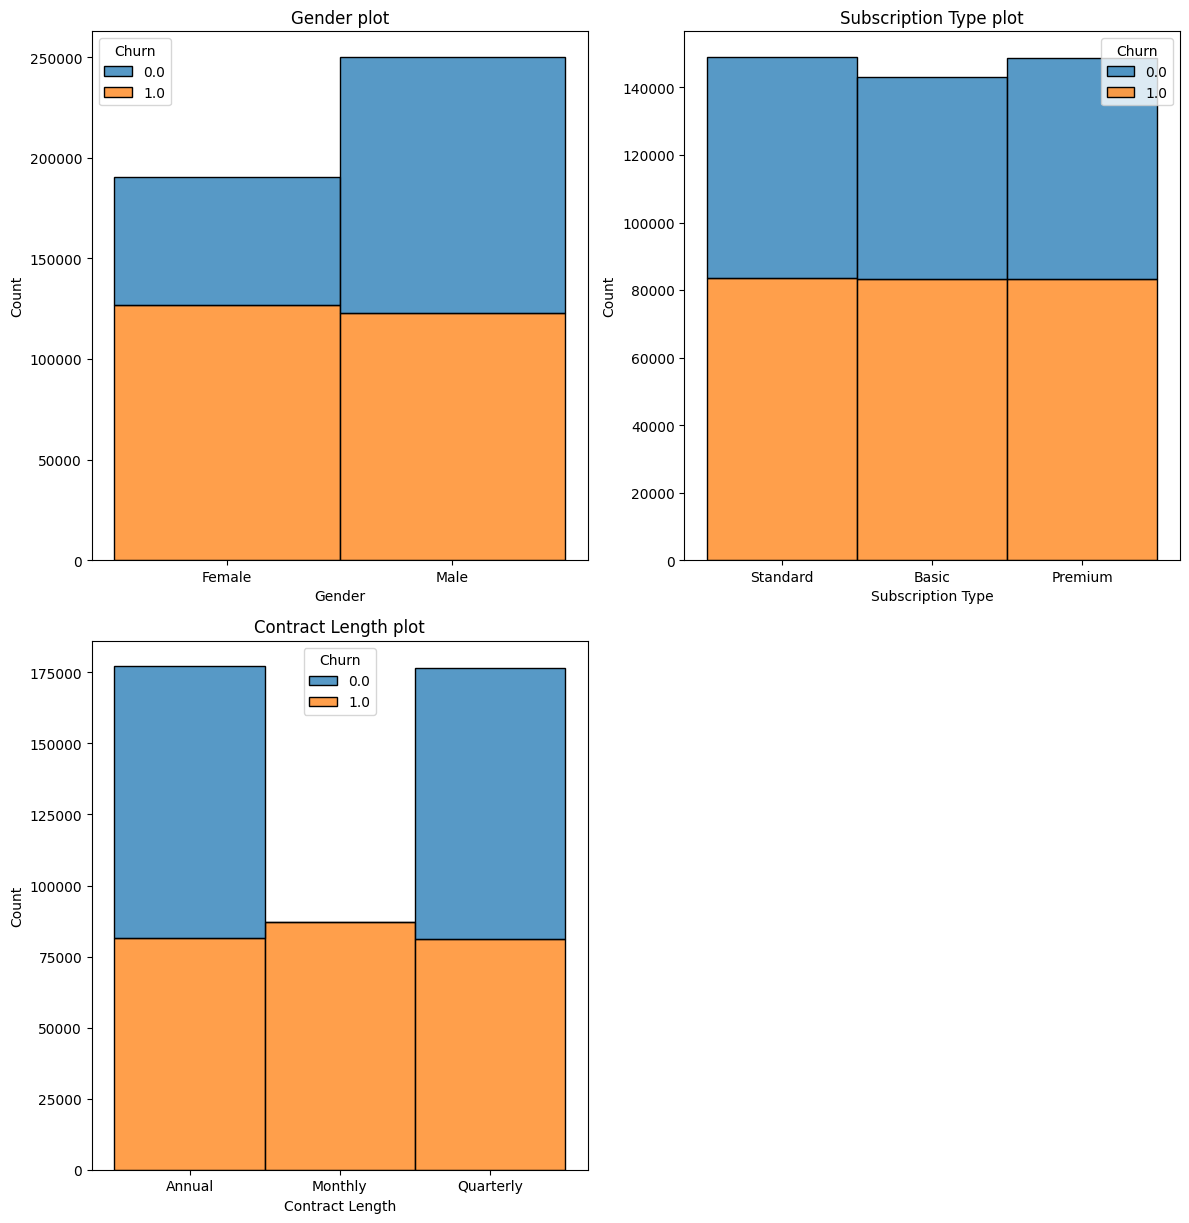

In [16]:
fig, ax = plt.subplots(3, 2, figsize = (12,18))
for pos, i in enumerate(categorical_feature):
    sns.histplot(df, x = i, stat = 'count', hue = 'Churn', multiple = 'stack', ax = ax[pos//2, pos%2])
    ax[pos//2, pos%2].set_title(f'{i} plot')
for pos in range(3, 3*2):
    fig.delaxes(ax[pos//2, pos%2])
plt.tight_layout()
plt.show()
    

### Comment : 
Tỉ lệ not churn hầu như cao gấp đôi churned

Tuy nhiên, trong contract theo tháng, tỉ lệ churned gần như là 100%

## 3.3. Correlation with target feature

In [17]:
le = LabelEncoder()
for i in categorical_feature:
    df[i] = le.fit_transform(df[i])


<Axes: >

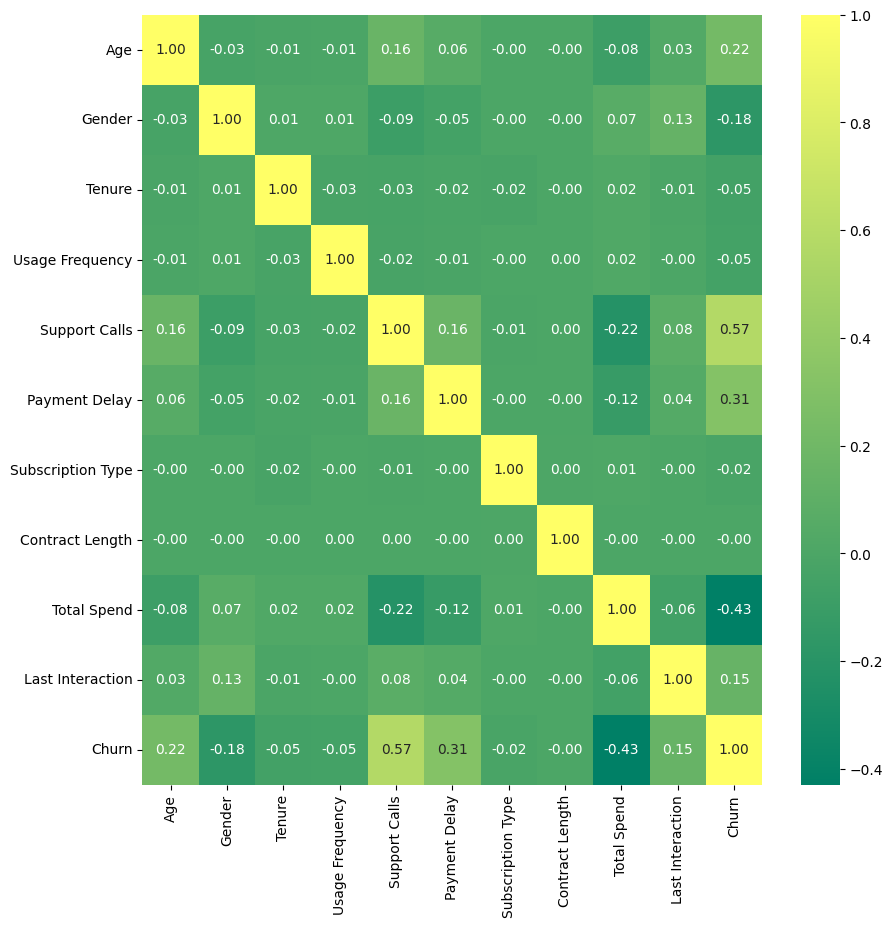

In [18]:
df_cor = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(df_cor, fmt = '.2f', cmap = 'summer', annot = True)

### Các biến ảnh hưởng tới Churn : 
- Age
- Support Calls
- Payment Delay
- Total Spend

# IV. Feature selection and modeling

In [19]:
x = df.drop(columns = 'Churn')
y = df['Churn']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [21]:
scaled = StandardScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_train_scaled[numerical_feature] = scaled.fit_transform(x_train_scaled[numerical_feature])
x_test_scaled[numerical_feature] = scaled.transform(x_test_scaled[numerical_feature])

In [22]:
#Đây là dự đoán nhị phân, nên ta dùng các mô hình sau : 
classifiers = {
    'LogisticRegression' : LogisticRegression(random_state = 42)
    ,'DecisionTree' : DecisionTreeClassifier(random_state = 42)
    ,'RandomForest' : RandomForestClassifier(random_state = 42)
    ,'Gradient Boosting' : GradientBoostingClassifier(random_state = 42)
    ,'KNN' : KNeighborsClassifier()
}

In [23]:
accuracy_df = pd.DataFrame()
f1_df = pd.DataFrame()
for name, model in classifiers.items():
    print(f'Calculating {name}......')
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy_table = pd.DataFrame({'name':[name], 'accuracy_score': [accuracy]})
    accuracy_df = pd.concat([accuracy_df, accuracy_table], ignore_index = True)

    f1_table = pd.DataFrame({'name':[name], 'f1_score':[f1]})
    f1_df = pd.concat([f1_df, f1_table], ignore_index = True)
    
    print(f'F1_Score is : {f1}')
    print(f'Accuracy_Score is : {accuracy}')
    print(classification_report(y_test, y_pred))

Calculating LogisticRegression......
F1_Score is : 0.8661645893386383
Accuracy_Score is : 0.8504429094786031
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83     38063
         1.0       0.88      0.85      0.87     50104

    accuracy                           0.85     88167
   macro avg       0.85      0.85      0.85     88167
weighted avg       0.85      0.85      0.85     88167

Calculating DecisionTree......
F1_Score is : 0.9998802371304817
Accuracy_Score is : 0.9998638946544626
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38063
         1.0       1.00      1.00      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167

Calculating RandomForest......
F1_Score is : 0.9997304985776314
Accuracy_Score is : 0.9996937629725408
              precision    reca

In [24]:
plot_score = pd.merge(accuracy_df, f1_df, how = 'inner', on = 'name').sort_values('f1_score', ascending = False)
plot_score

,name,accuracy_score,f1_score
1,DecisionTree,0.999864,0.999880
2,RandomForest,0.999694,0.999730
3,Gradient Boosting,0.996802,0.997178
4,KNN,0.959350,0.962979
0,LogisticRegression,0.850443,0.866165


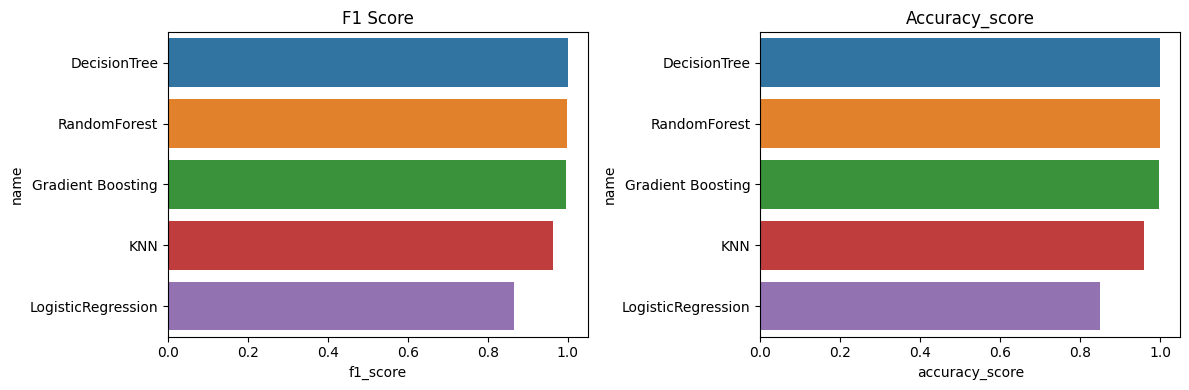

In [25]:
fig, ax = plt.subplots(1,2,figsize = (12,4))
sns.barplot(plot_score, x = 'f1_score', y = 'name', ax = ax[0], hue = 'name')
sns.barplot(plot_score, x = 'accuracy_score', y = 'name', ax = ax[1], hue = 'name')
ax[0].set_title('F1 Score')
ax[1].set_title('Accuracy_score')
plt.tight_layout()
plt.show()

In [26]:
# Importance feature
# Áp dụng với 3 model : Decision Tree, Random Forest, Gradient Boosting

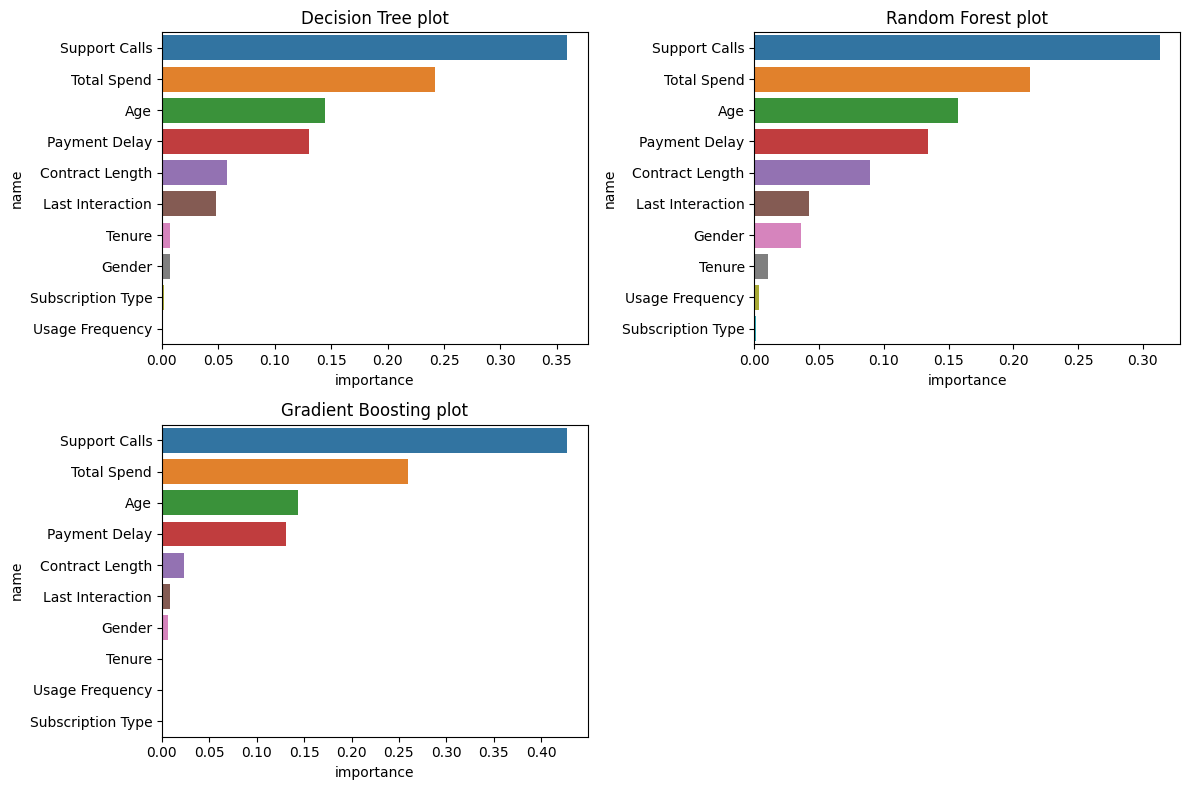

In [37]:
classifier = {
    'Decision Tree': DecisionTreeClassifier(random_state = 42),
    'Random Forest' : RandomForestClassifier(random_state = 42),
    'Gradient Boosting' : GradientBoostingClassifier(random_state = 42)
}
fig, ax = plt.subplots(2,2, figsize = (12,8))
for pos, i in enumerate(classifier):
    model = classifier[i]
    model.fit(x_train_scaled, y_train)
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({'name': x.columns, 'importance':importance}).sort_values('importance', ascending = False)
    sns.barplot(feature_importance, x = 'importance', y = 'name', hue = 'name', ax =ax[pos//2, pos%2])
    ax[pos//2, pos%2].set_title(i + ' plot')

for pos in range(3, 4):
    fig.delaxes(ax[pos//2, pos%2])
plt.tight_layout()
plt.show()

In [ ]:
#KNN
plt.figure(figsize = (12,8))
model = KNeighborsClassifier()
model.fit(x_train_scaled, y_train)
importance = permutation_importance(model, x_test_scaled, y_test, n_repeats = 5, n_jobs = 5, random_state = 42)
feature_importance = pd.DataFrame({'name': x.columns, 'importance':importance.importances_mean}).sort_values('importance', ascending = False)
sns.barplot(feature_importance, x = 'importance', y = 'name', hue = 'name')
plt.tight_layout()
plt.show()


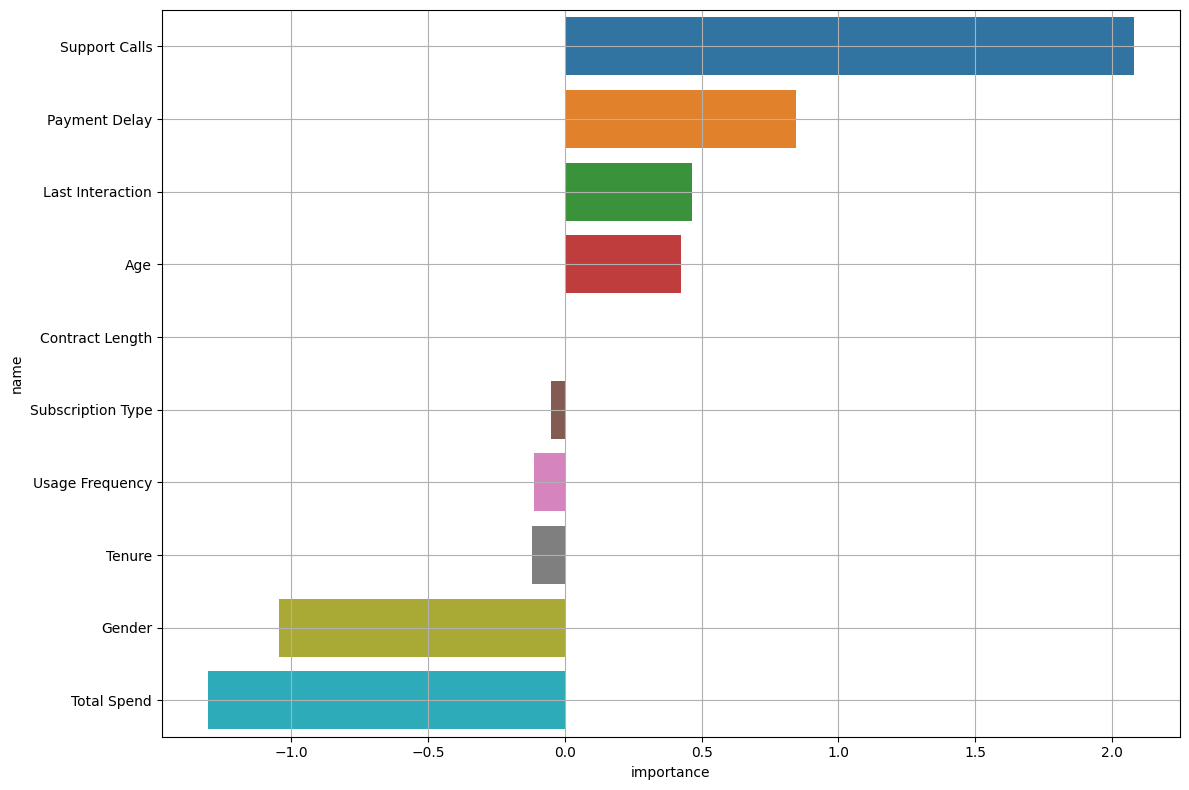

In [42]:
#Logistic Regression
model = LogisticRegression(random_state = 42)
model.fit(x_train_scaled, y_train)
importance = model.coef_[0]
feature_importance = pd.DataFrame({'name':x.columns, 'importance': importance}).sort_values('importance', ascending = False)
plt.figure(figsize = (12,8))
sns.barplot(feature_importance, x = 'importance', y = 'name', hue = 'name')
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
model = DecisionTreeClassifier()
model.fit(x_train_scaled, y_train)

x_train_scaled_np = x_train_scaled.values
x_test_scaled_np = x_test_scaled.values
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_scaled_np, mode="classification", feature_names=x.columns, class_names=model.classes_)
exp = explainer.explain_instance(x_test_scaled.iloc[0], model.predict_proba, num_features=len(x.columns))
exp.show_in_notebook(
    show_table=True, show_all=False)
exp.as_list()

[('Support Calls > 0.78', 0.1960714050887706),
 ('1.00 < Contract Length <= 2.00', -0.08463543238381516),
 ('Gender <= 0.00', 0.08057232680447154),
 ('-0.63 < Total Spend <= 0.12', -0.07088697890269313),
 ('-0.12 < Payment Delay <= 0.73', -0.05409237373025759),
 ('-0.87 < Last Interaction <= -0.06', -0.035884063778650735),
 ('Tenure <= -0.89', 0.013976975891797931),
 ('-0.79 < Usage Frequency <= 0.02', 0.013570879652935465),
 ('0.00 < Subscription Type <= 1.00', -0.0027238341884948895),
 ('Age <= -0.83', -0.0025529578168917537)]